Imports sraty pierdaty


In [114]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd


In [115]:
dataFrame = pd.read_csv("processed_dataset.csv")
dataFrame.head()

,Unnamed: 0,Make,Model,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Drag coefficient
0,0,Acura,ILX,2.4,4,7.0,0.30
1,1,Acura,MDX SH-AWD,3.5,6,9.4,0.37
2,2,Acura,RDX SH-AWD,2.0,4,8.6,0.37
3,3,Acura,RDX SH-AWD A-SPEC,2.0,4,9.1,0.37
4,4,Acura,TLX SH-AWD,2.0,4,8.0,0.30


In [116]:
dataFrame = dataFrame.sort_values(by ='Engine Size(L)')
print(dataFrame.dtypes)

Unnamed: 0                            int64
Make                                 object
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption(Hwy (L/100 km))    float64
Drag coefficient                    float64
dtype: object


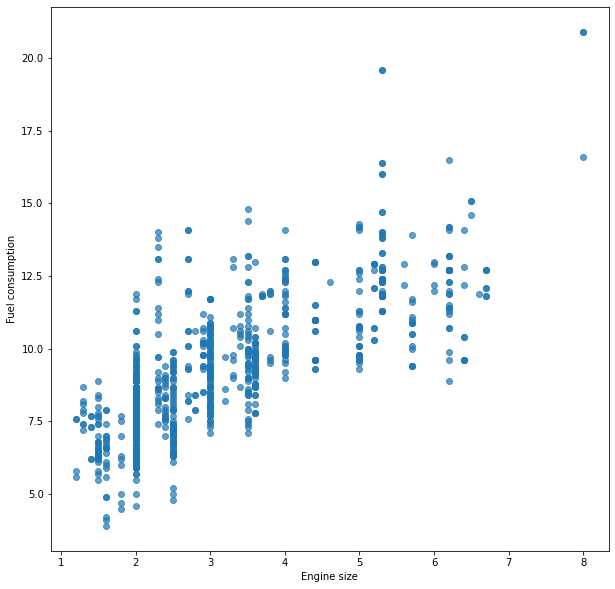

In [117]:
plt.figure(0,figsize=(10,10))
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'],alpha=0.7,marker='o')
plt.xlabel('Engine size')
plt.ylabel('Fuel consumption')
plt.show()

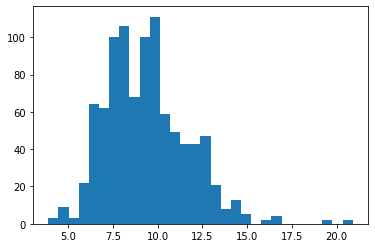

In [118]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30)
plt.show()

In [119]:
N = dataFrame.shape[0]
engine_size_data = dataFrame['Engine Size(L)']
cylinders_data = dataFrame['Cylinders']
drag_coeficient_data = dataFrame['Drag coefficient']
fuel_consumption_data = dataFrame['Fuel Consumption(Hwy (L/100 km))']

In [120]:
model_2_prior=CmdStanModel(stan_file='model_2_prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [121]:
samples_2_prior = model_2_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data},
iter_sampling=1,
iter_warmup=2000,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [122]:
dataFrame_model_2_prior = samples_2_prior.draws_pd()
dataFrame_model_2_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_cylinders,beta_drag_coeficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,15.5617,0.777181,-1.27227,0.127591,0.610578,12.8661,13.4477,14.1079,...,4.80138,4.60367,4.52583,5.00854,6.15338,4.448,4.4837,1.33208,1.61435,1.60852


In [123]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_prior['fuel_consumption[' + str(i)+ ']'].mean()
    list.append(val)


(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   6.,   3.,   5.,   0.,
          3.,   1.,   3.,   4.,  11.,  15.,  29.,  45.,  71., 107.,  94.,
         83.,  92., 101., 120.,  79.,  50.,  16.,   4.]),
 array([ 1.33208   ,  1.75794067,  2.18380133,  2.609662  ,  3.03552267,
         3.46138333,  3.887244  ,  4.31310467,  4.73896533,  5.164826  ,
         5.59068667,  6.01654733,  6.442408  ,  6.86826867,  7.29412933,
         7.71999   ,  8.14585067,  8.57171133,  8.997572  ,  9.42343267,
         9.84929333, 10.275154  , 10.70101467, 11.12687533, 11.552736  ,
        11.97859667, 12.40445733, 12.830318  , 13.25617867, 13.68203933,
        14.1079    ]),
 <BarContainer object of 30 artists>)

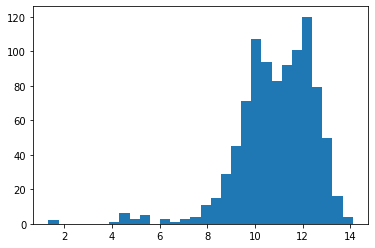

In [124]:
plt.hist(list,bins=30)

In [125]:
generated_fuel_consumption = samples_2_prior.stan_variable('fuel_consumption')

In [126]:
model_2_post=CmdStanModel(stan_file='model_2_post.stan')

INFO:cmdstanpy:compiling stan file /home/TOOLS/DOCKER/project/data_analitics/model_2_post.stan to exe file /home/TOOLS/DOCKER/project/data_analitics/model_2_post


INFO:cmdstanpy:compiled model executable: /home/TOOLS/DOCKER/project/data_analitics/model_2_post


In [127]:
samples_2_post = model_2_post.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data, 'fuel_consumption':fuel_consumption_data},
iter_sampling=1,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                   


INFO:cmdstanpy:CmdStan done processing.


In [128]:
dataFrame_model_2_post = samples_2_post.draws_pd()
dataFrame_model_2_post.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_engine_size,beta_cylinders,...,y_out[937],y_out[938],y_out[939],y_out[940],y_out[941],y_out[942],y_out[943],y_out[944],y_out[945],y_out[946]
0,-796.131,0.965834,0.090928,4.0,23.0,0.0,798.035,2.52955,0.554205,0.466085,...,15.2729,15.0092,14.8487,14.3314,13.9805,14.5235,14.6873,15.9191,18.6526,13.0315


In [129]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_post['y_out[' + str(i)+ ']'].mean()
    list.append(val)


(array([ 3.,  6.,  6., 16., 26., 46., 60., 56., 94., 96., 82., 99., 65.,
        62., 53., 46., 26., 30., 27., 11., 13., 10.,  6.,  3.,  2.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 3.93381   ,  4.42443633,  4.91506267,  5.405689  ,  5.89631533,
         6.38694167,  6.877568  ,  7.36819433,  7.85882067,  8.349447  ,
         8.84007333,  9.33069967,  9.821326  , 10.31195233, 10.80257867,
        11.293205  , 11.78383133, 12.27445767, 12.765084  , 13.25571033,
        13.74633667, 14.236963  , 14.72758933, 15.21821567, 15.708842  ,
        16.19946833, 16.69009467, 17.180721  , 17.67134733, 18.16197367,
        18.6526    ]),
 <BarContainer object of 30 artists>)

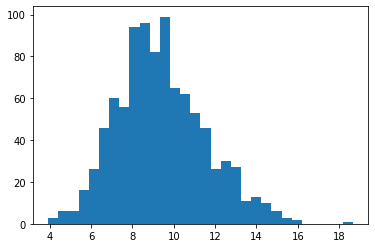

In [130]:
plt.hist(list,bins=30)